### Import libraries

In [7]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### Check out the directories

In [8]:
# inserting the parent directory into current path
sys.path.insert(1, '../COVID_19/')

### Checking out the files and numbers.

In [39]:
NORMAL_dir = '../All_data/NORMAL/'
NORMAL_img_list = os.listdir(NORMAL_dir)
NORMAL_count = len(NORMAL_img_list)
print('NORMAL_count = ', NORMAL_count)

Covid_dir = '../All_data/COVID/'
Covid_img_list = os.listdir(Covid_dir)
Covid_count = len(Covid_img_list)
print('Covid_count = ', Covid_count)

NORMAL_count =  196
Covid_count =  196


Number of Normal and Covid cases are balanced. I will increase the number of two other classes.

Make a balancing data generator.

In [30]:
Augment_data_gen = image.ImageDataGenerator(
                    rotation_range=45, 
                    width_shift_range=0.0,
                    height_shift_range=0.0,
                    shear_range=0.2, 
                    zoom_range=0.5,
                    horizontal_flip=True,
                    fill_mode='nearest')

pick random image from source directory and make new one.
### Augment NORMAL images

In [31]:
NORMAL_Number_tobe_generated = 1000

# if not os.path.exists( '../Dataset_4_classes_balanced/Train/Pneumocystis/'):
#     os.makedirs('../Dataset_4_classes_balanced/Train/Pneumocystis/')
    
for i in range(0, NORMAL_Number_tobe_generated):
    

    # select a random img
    rand_img_num = random.randint(0, NORMAL_count-1)
    img_name = NORMAL_img_list[rand_img_num]

    img_address = NORMAL_dir + img_name
    img = load_img(img_address)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    

    for batch in Augment_data_gen.\
                flow(x,batch_size=1,
                save_to_dir='../Dataset_augmented/NORMAL/',
                save_prefix='augmented_normal',
                save_format='jpeg'):
        break

        
        
generated_NORMAL_dir = '../Dataset_augmented/NORMAL/'
generated_NORMAL_img_list = os.listdir(generated_NORMAL_dir)
generated_NORMAL_count = len(generated_NORMAL_img_list)
print('generated_NORMAL_count = ', generated_NORMAL_count) 

generated_NORMAL_count =  948


pick random image from source directory and make new one.
### Augment covid images

In [41]:
Covid_Number_tobe_generated = 1000

# if not os.path.exists( '../Dataset_4_classes_balanced/Train/Pneumocystis/'):
#     os.makedirs('../Dataset_4_classes_balanced/Train/Pneumocystis/')
    
for i in range(0, Covid_Number_tobe_generated):
    

    # select a random img
    rand_img_num = random.randint(0, Covid_count-1)
    img_name = Covid_img_list[rand_img_num]

    img_address = Covid_dir + img_name
    img = load_img(img_address)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    

    for batch in Augment_data_gen.\
                flow(x,batch_size=1,
                save_to_dir='../Dataset_augmented/COVID',
                save_prefix='augmented_covid',
                save_format='jpeg'):
        break

        
        
generated_Covid_dir = '../Dataset_augmented/COVID'
generated_Covid_img_list = os.listdir(generated_Covid_dir)
generated_Covid_count = len(generated_Covid_img_list)
print('generated_Covid_count = ', generated_Covid_count) 

generated_Covid_count =  969


In [ ]:
Check out the number of images

In [42]:
NORMAL_dir = '../Dataset_augmented/NORMAL/'
NORMAL_img_list = os.listdir(NORMAL_dir)
NORMAL_count = len(NORMAL_img_list)
print('NORMAL_count = ', NORMAL_count)

Covid_dir = '../Dataset_augmented/COVID'
Covid_img_list = os.listdir(Covid_dir)
Covid_count = len(Covid_img_list)
print('Covid_count = ', Covid_count)

NORMAL_count =  948
Covid_count =  969


Now we have almost 2000 images ready for next step.

# Flow data

In [43]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [72]:
train_generator = train_datagen.flow_from_directory(
                    directory='../Dataset_augmented/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=128,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 1917 images belonging to 2 classes.


In [73]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1}

In [74]:
image_batch, label_batch = next(iter(train_generator))

### Show some images after data augmentation

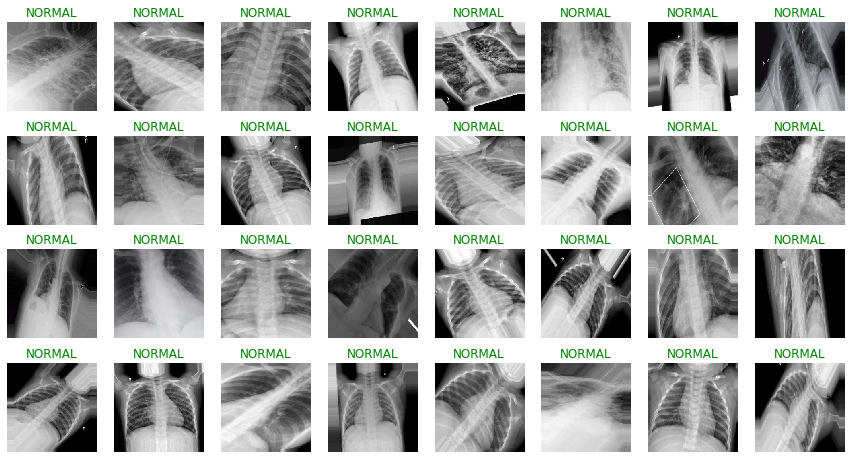

In [75]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 8))
    for n in range(32):
        ax = plt.subplot(4, 8, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[0][0]==1:
            tit = plt.title("NORMAL")
            plt.setp(tit, color='g')
            
        else:
            label_batch[0][0]==1
            tit = plt.title("COVID")
            plt.setp(tit, color='r')

#         elif label_batch[n][2]==1:
#             tit = plt.title("Pneumocystis")
#             plt.setp(tit, color='b')
#         else:
#             plt.title("Streptococcus")
        plt.axis("off")

show_batch(image_batch, label_batch)
# plt.savefig("../Assets/plot_01_assets_2_4classes_balanced.png")

In [76]:
classes = pd.DataFrame(train_generator.classes)
classes[0].value_counts(normalize=False)

0    969
1    948
Name: 0, dtype: int64